In [1]:
# Naive Bayes, DT & MLP Classification on the Soybean Dataset (with missing-value handling)
# ==============================================================================
# This version:
# 1. Loads the Soybean dataset from OpenML
# 2. Replaces missing values
# 3. Encodes categorical features numerically
# 4. Trains a Categorical Naive Bayes classifier
# 5. Evaluates its performance
# 6. Trains a Decision Tree Classifier
# 7. Evaluates its performance

# Step 1: Import libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Step 2: Load dataset
soybean = fetch_openml(name='soybean', version=1, as_frame=True)
X = soybean.data
y = soybean.target

print("Original dataset shape:", X.shape)
print("Number of classes:", len(y.unique()))

# Step 3: Replace missing categorical values with the most frequent value in each column
for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# Step 4: Encode categorical features numerically
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

Original dataset shape: (683, 35)
Number of classes: 19


In [5]:
# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# Step 6: Initialize and train the Naive Bayes model
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

# Step 7: Evaluate performance
y_pred = nb_model.predict(X_test)

print("\nModel Evaluation Results")
print("========================")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Example prediction
sample = X_test[0].reshape(1, -1)
predicted_class = nb_model.predict(sample)[0]
print("\nPredicted class for sample 0:", predicted_class)


Model Evaluation Results
Accuracy: 0.8905109489051095

Classification Report:
                              precision    recall  f1-score   support

               2-4-d-injury       1.00      1.00      1.00         3
        alternarialeaf-spot       0.67      1.00      0.80        18
                anthracnose       1.00      1.00      1.00         9
           bacterial-blight       1.00      1.00      1.00         4
          bacterial-pustule       1.00      1.00      1.00         4
                 brown-spot       0.86      0.67      0.75        18
             brown-stem-rot       1.00      1.00      1.00         9
               charcoal-rot       1.00      1.00      1.00         4
              cyst-nematode       1.00      1.00      1.00         3
diaporthe-pod-&-stem-blight       0.75      1.00      0.86         3
      diaporthe-stem-canker       1.00      1.00      1.00         4
               downy-mildew       1.00      1.00      1.00         4
         frog-eye-leaf

In [7]:
# Step 9: Initialize the Decision Tree model
# Use 'entropy' for information gain or 'gini' for Gini impurity
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Step 10: Train the model
dt_model.fit(X_train, y_train)

# Step 11: Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Step 12: Evaluate performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8759124087591241

Classification Report:
                              precision    recall  f1-score   support

               2-4-d-injury       1.00      1.00      1.00         3
        alternarialeaf-spot       0.88      0.83      0.86        18
                anthracnose       0.88      0.78      0.82         9
           bacterial-blight       1.00      1.00      1.00         4
          bacterial-pustule       1.00      1.00      1.00         4
                 brown-spot       0.74      0.78      0.76        18
             brown-stem-rot       1.00      1.00      1.00         9
               charcoal-rot       1.00      1.00      1.00         4
              cyst-nematode       1.00      1.00      1.00         3
diaporthe-pod-&-stem-blight       0.75      1.00      0.86         3
      diaporthe-stem-canker       1.00      1.00      1.00         4
               downy-mildew       1.00      1.00      1.00         4
         frog-eye-leaf-spot       0.70      0.7

In [8]:
# Step 13: Example prediction
sample = X_test[0].reshape(1, -1)
predicted_class = dt_model.predict(sample)[0]
print("\nPredicted class for sample 0:", predicted_class)


Predicted class for sample 0: anthracnose


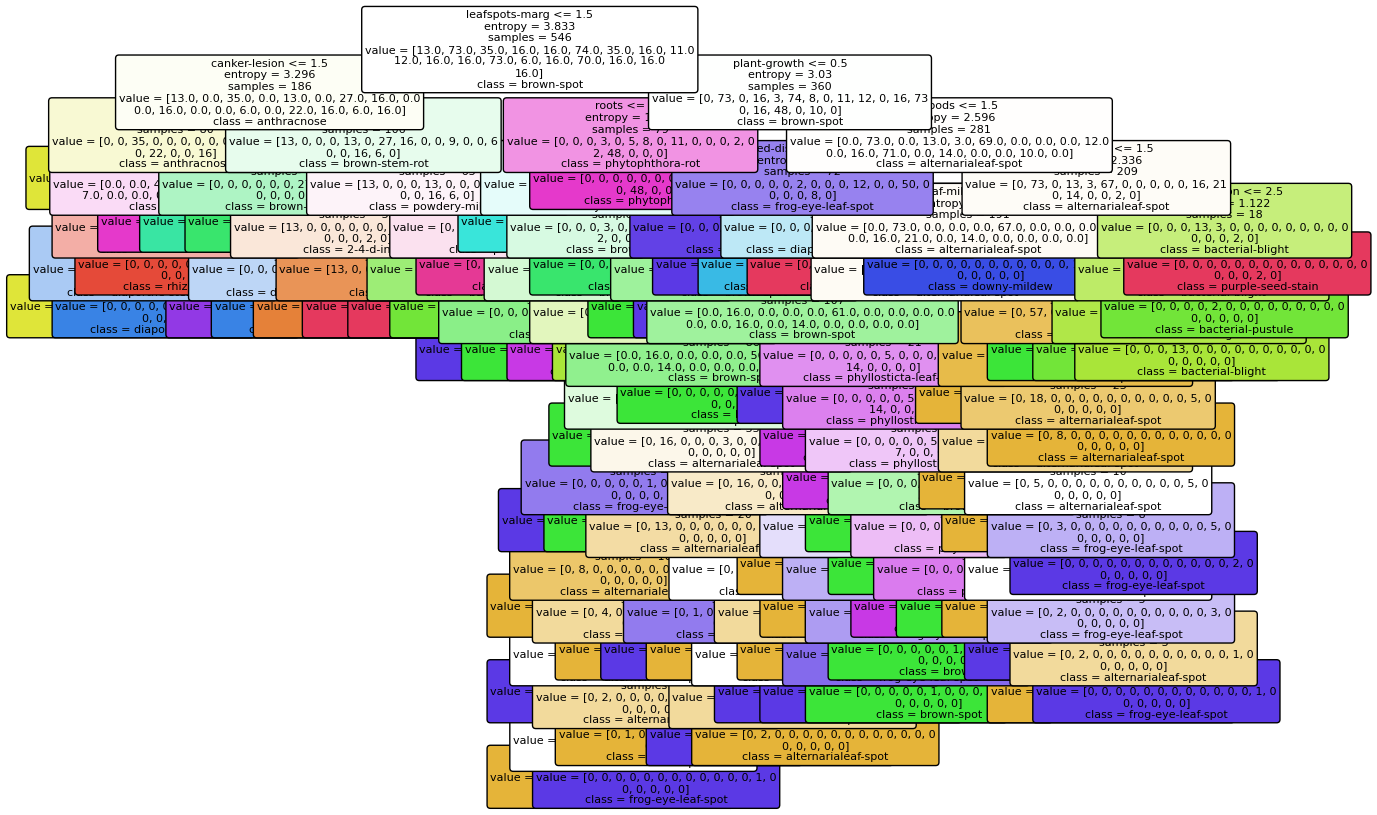

In [9]:
# Step 14 (optional): Visualize the decision tree
plt.figure(figsize=(15, 10))
plt.title("Decision Tree for Soybean Classification")
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=sorted(y.unique()),
    rounded=True,
    fontsize=8
)
plt.show()

In [15]:
# Step 15: One-hot encode categorical variables
OEencoder = OrdinalEncoder()
y_encoded = OEencoder.fit_transform(pd.DataFrame(y))

# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded.squeeze(-1), test_size=0.2, random_state=42, stratify=y
)

In [16]:
# Step 15: Scale features (important for MLPs)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Step 16: Initialize the MLP model
# - hidden_layer_sizes: two hidden layers of 50 neurons each
# - max_iter: set high enough to ensure convergence
# - early_stopping: stops if validation score doesn’t improve
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 50),
    activation='relu',
    solver='adam',
    alpha=0.005,
    learning_rate_init=0.01,
    max_iter=500,
    max_fun=2000,
    random_state=42,
    early_stopping=True,
    verbose=True  # Prints progress
)

In [18]:
# Step 17: Train the MLP model
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 2.83597737
Validation score: 0.181818
Iteration 2, loss = 2.43718046
Validation score: 0.509091
Iteration 3, loss = 2.11434085
Validation score: 0.563636
Iteration 4, loss = 1.73327001
Validation score: 0.636364
Iteration 5, loss = 1.36731854
Validation score: 0.745455
Iteration 6, loss = 1.06109355
Validation score: 0.727273
Iteration 7, loss = 0.81860343
Validation score: 0.836364
Iteration 8, loss = 0.65253699
Validation score: 0.854545
Iteration 9, loss = 0.52711701
Validation score: 0.800000
Iteration 10, loss = 0.45187907
Validation score: 0.890909
Iteration 11, loss = 0.38583343
Validation score: 0.872727
Iteration 12, loss = 0.34661307
Validation score: 0.963636
Iteration 13, loss = 0.34667240
Validation score: 0.927273
Iteration 14, loss = 0.28599820
Validation score: 0.890909
Iteration 15, loss = 0.26546778
Validation score: 0.963636
Iteration 16, loss = 0.25858164
Validation score: 0.909091
Iteration 17, loss = 0.24820113
Validation score: 0.927273
Iterat

MLPClassifier(alpha=0.005, early_stopping=True, hidden_layer_sizes=(50, 50),
              learning_rate_init=0.01, max_fun=2000, max_iter=500,
              random_state=42, verbose=True)


Accuracy: 0.8613138686131386

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       0.60      0.83      0.70        18
         2.0       1.00      0.89      0.94         9
         3.0       0.75      0.75      0.75         4
         4.0       0.75      0.75      0.75         4
         5.0       0.80      0.67      0.73        18
         6.0       1.00      1.00      1.00         9
         7.0       1.00      1.00      1.00         4
         8.0       1.00      1.00      1.00         3
         9.0       0.75      1.00      0.86         3
        10.0       1.00      1.00      1.00         4
        11.0       1.00      1.00      1.00         4
        12.0       1.00      0.72      0.84        18
        13.0       1.00      1.00      1.00         2
        14.0       0.50      0.50      0.50         4
        15.0       1.00      1.00      1.00        18
        16.0       1.00   

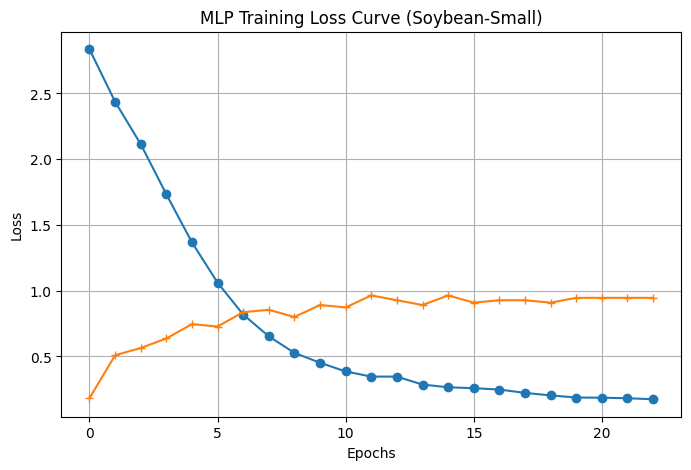

In [19]:
# Step 8: Evaluate
y_pred = mlp.predict(X_test_scaled)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_, marker='o')
plt.plot(mlp.validation_scores_,marker='+')
plt.title("MLP Training Loss Curve (Soybean-Small)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()